# __<u>NDOUDI Norine Assignment 1 Artificial Intelligence Advanced<u>__

**<span style="color:red;">ii) A random initial state where we initialize the cities and airports coordinates</span>**

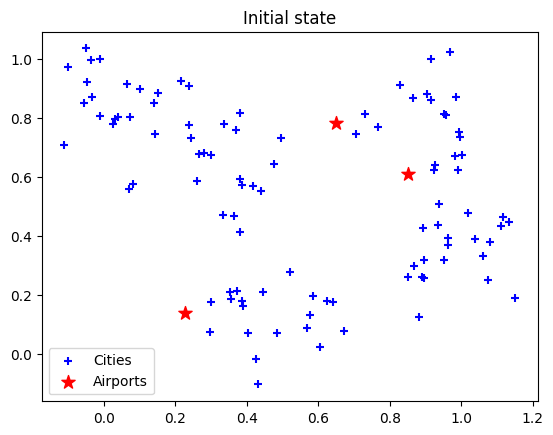

airports 1: COORDINATES (0.85, 0.61)
airports 2: COORDINATES (0.23, 0.14)
airports 3: COORDINATES (0.65, 0.78)


In [2]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.title('Initial state')
plt.legend()
plt.show()

# Display the initial coordinates of the airports
for i, (x, y) in enumerate(airports):
    print(f'airports {i + 1}: COORDINATES ({x:.2f}, {y:.2f})')

**<span style="color:red;">iii) Algorith of the function which determine the closest airport of a city </span>**

In [1]:
def closest_cities_to_airports(cities, airports):
    closestCities_airports = [[] for k in range(num_air)]
    for city_x, city_y in cities:
        #Initalization of the closest_airport index and the min distance for comparison
        closest_airport = -1
        min_distance = float('inf')
        for i, (airport_x, airport_y) in enumerate(airports):
            #Calculation of the distance (x1 -x2)² + (y1 - y2)²
            distance = (airport_x - city_x) ** 2 + (airport_y - city_y) ** 2
            #Compare the distance of the city and each airport to see the closest one
            if distance < min_distance:
                min_distance = distance
                closest_airport = i
                
        closestCities_airports[closest_airport].append((city_x, city_y))
    return closestCities_airports

**<span style="color:red;">iii) Then the objective function</span>**

In [3]:
def objective_function(closestCity):
    sumTotal = 0
    # n is the number of the airports
    for n in range(num_air):
        closest_cities_to_airport_n = closestCity[n]
        #coordinates of cities whose closest airport is airport n.
        for city_x, city_y in closest_cities_to_airport_n:
            distance = (airports[n][0] - city_x) ** 2 + (airports[n][1] - city_y) ** 2
            sumTotal += distance
    return sumTotal

**<span style="color:red;">IV) Locations of airports that minimize the 
objective function using gradient based optimization</span>**  
**<span style="color:red"> and V)  Plot the objective function values at every time of updating
the locations to terminate the algorithm. </span>**>.

The objective function is this one  
$$
f(x_{1},y_{1},x_{2},y_{2},x_{3},y_{3}) = \sum_{i=1}^{n}\sum_{c\in C_{i}}\left ( x_{i} - x_{c} \right )^2 + \left ( y_{i} - y_{c} \right )^2
$$

The derivation of the function with respect to xi and yi is :  
$$
\frac{\partial f}{\partial x_{i}} = 2 \times \left ( x_{i} - x_{c} \right )  \quad \mathbf{and} \quad \frac{\partial f}{\partial y_{i}} = 2 \times \left ( y_{i} - y_{c} \right ) 
$$

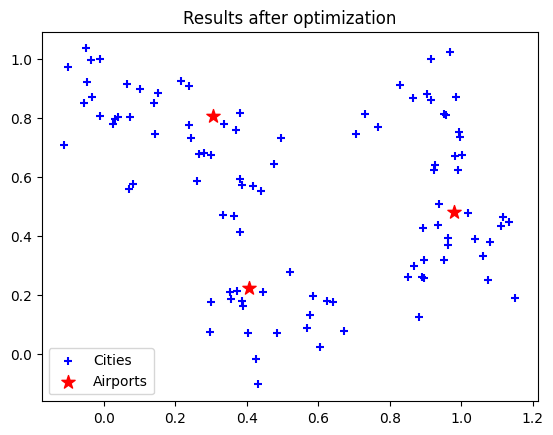

airports 1: COORDINATES (0.98, 0.48)
airports 2: COORDINATES (0.41, 0.22)
airports 3: COORDINATES (0.31, 0.81)


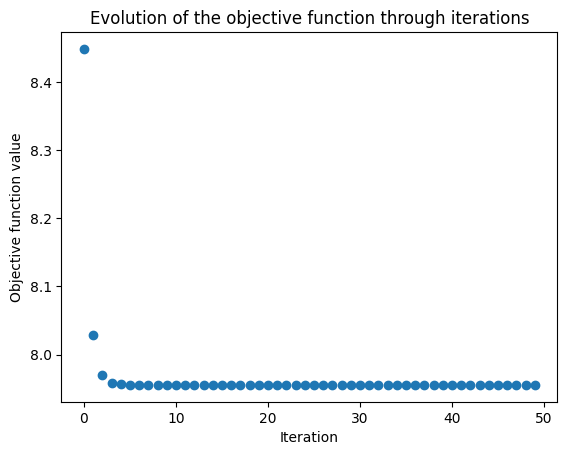

In [4]:
alpha = 0.01
# Number of iterations chosen where we appear to have an optimal solution for the airport coordinates
num_iterations = 50
closestCity = closest_cities_to_airports(cities, airports)

# List to store the values of the objective function at each iteration
objective_values = []

# gradient descent to minimize the objective funtion
for iteration in range(num_iterations):
    gradient = [(0, 0) for k in range(num_air)]
    for i in range(num_air):
        for city_x, city_y in closestCity[i]:
            #gradient calculation with the derivation with respect to xi and yi 
            gradient[i] = (gradient[i][0] + 2 * (airports[i][0] - city_x), gradient[i][1] + 2 * (airports[i][1] - city_y))
    
    #Airports coordinates update
    airports = [(airports[i][0] - alpha * gradient[i][0], airports[i][1] - alpha * gradient[i][1]) for i in range(num_air)]
    
    # Calculation of the objective function value for this iteration and add it to the list
    objective_values.append(objective_function(closestCity))

    
# Affichage des résultats
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+', color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt.title('Results after optimization')
plt.show()

# Display the final coordinates of the airports
for i, (x, y) in enumerate(airports):
    print(f'airports {i + 1}: COORDINATES ({x:.2f}, {y:.2f})')
    
# Display of the objective function values over iterations
plt.scatter(range(num_iterations), objective_values)
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.title('Evolution of the objective function through iterations')
plt.show()
